# Numerical 1-D FEM solution of the heat diffusion equation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.sparse import csr_matrix
from scipy import sparse
from numpy import array
from scipy.sparse.linalg import spsolve
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300


First we define some numerical constants and define the problem

In [19]:
#constants
lx          = 10           #width
nnod        = 21            #number of nodes
nnodel      = 2            #nodes per element
k           = 1            #conductivity
Q           = 1            #source term
Tleft       = 0            #T boundary conditions
Trite       = 0

#numerics
nel         = nnod-1       #numnber of elements

Now we make our FEM mesh and element connectivity

In [20]:
Gcoord, dx  = np.linspace(0,lx,nnod,   retstep=True) #global coordinates
EL2NOD      = np.array([np.arange(1,nnod), np.arange(2,nnod+1)])  # connectivity matrix

Now we spell out our analytically-derived element stiffness matrix (see previous sections):

In [21]:
#Ael    = ???
#Rhs_el  = ???

In [22]:
# hide
Ael    = np.array([[k/dx, -k/dx],[-k/dx, k/dx]])
Rhs_el  = np.array([Q*dx/2, Q*dx/2])

Now we need to loop over all elements and assemble the global stiffness matrix

In [23]:
Rhs_all = np.zeros(nnod)
I = []
J = []
K = []
for iel in range(0,nel):
    
    I.append(list((EL2NOD[:,iel]*np.ones((nnodel,1))).T.reshape(nnodel*nnodel)))
    J.append(list((np.ones((nnodel,1)) * EL2NOD[:,iel]).reshape(nnodel*nnodel)))
    K.append(list(Ael.reshape(nnodel*nnodel)))
    
    Rhs_all[EL2NOD[:,iel]-1] += Rhs_el
    
    
I=np.array(I,dtype=int).reshape(-1)-1
J=np.array(J,dtype=int).reshape(-1)-1
K=np.array(K,dtype=float).reshape(-1)

A_all = sparse.csr_matrix((K,(I,J)),shape=(nnod,nnod))
print(A_all)

  (0, 0)	2.0
  (0, 1)	-2.0
  (1, 0)	-2.0
  (1, 1)	4.0
  (1, 2)	-2.0
  (2, 1)	-2.0
  (2, 2)	4.0
  (2, 3)	-2.0
  (3, 2)	-2.0
  (3, 3)	4.0
  (3, 4)	-2.0
  (4, 3)	-2.0
  (4, 4)	4.0
  (4, 5)	-2.0
  (5, 4)	-2.0
  (5, 5)	4.0
  (5, 6)	-2.0
  (6, 5)	-2.0
  (6, 6)	4.0
  (6, 7)	-2.0
  (7, 6)	-2.0
  (7, 7)	4.0
  (7, 8)	-2.0
  (8, 7)	-2.0
  (8, 8)	4.0
  :	:
  (12, 12)	4.0
  (12, 13)	-2.0
  (13, 12)	-2.0
  (13, 13)	4.0
  (13, 14)	-2.0
  (14, 13)	-2.0
  (14, 14)	4.0
  (14, 15)	-2.0
  (15, 14)	-2.0
  (15, 15)	4.0
  (15, 16)	-2.0
  (16, 15)	-2.0
  (16, 16)	4.0
  (16, 17)	-2.0
  (17, 16)	-2.0
  (17, 17)	4.0
  (17, 18)	-2.0
  (18, 17)	-2.0
  (18, 18)	4.0
  (18, 19)	-2.0
  (19, 18)	-2.0
  (19, 19)	4.0
  (19, 20)	-2.0
  (20, 19)	-2.0
  (20, 20)	2.0


Now we apply the boundary conditions in the usual way and solve using a sparse solver!

In [24]:
#Apply boundary conditions
#A_all??
#A_all??
#A_all??
# A_all??
#Rhs_all[0] = ?
#Rhs_all[-1] = ?

In [25]:
# hide
#Apply boundary conditions
A_all[0,0]       = 1
A_all[0,1]       = 0
A_all[nnod-1,nnod-1] = 1
A_all[nnod-1,nnod-2] = 0
Rhs_all[0] = Tleft
Rhs_all[-1] = Trite
print(A_all)

  (0, 0)	1.0
  (0, 1)	0.0
  (1, 0)	-2.0
  (1, 1)	4.0
  (1, 2)	-2.0
  (2, 1)	-2.0
  (2, 2)	4.0
  (2, 3)	-2.0
  (3, 2)	-2.0
  (3, 3)	4.0
  (3, 4)	-2.0
  (4, 3)	-2.0
  (4, 4)	4.0
  (4, 5)	-2.0
  (5, 4)	-2.0
  (5, 5)	4.0
  (5, 6)	-2.0
  (6, 5)	-2.0
  (6, 6)	4.0
  (6, 7)	-2.0
  (7, 6)	-2.0
  (7, 7)	4.0
  (7, 8)	-2.0
  (8, 7)	-2.0
  (8, 8)	4.0
  :	:
  (12, 12)	4.0
  (12, 13)	-2.0
  (13, 12)	-2.0
  (13, 13)	4.0
  (13, 14)	-2.0
  (14, 13)	-2.0
  (14, 14)	4.0
  (14, 15)	-2.0
  (15, 14)	-2.0
  (15, 15)	4.0
  (15, 16)	-2.0
  (16, 15)	-2.0
  (16, 16)	4.0
  (16, 17)	-2.0
  (17, 16)	-2.0
  (17, 17)	4.0
  (17, 18)	-2.0
  (18, 17)	-2.0
  (18, 18)	4.0
  (18, 19)	-2.0
  (19, 18)	-2.0
  (19, 19)	4.0
  (19, 20)	-2.0
  (20, 19)	0.0
  (20, 20)	1.0


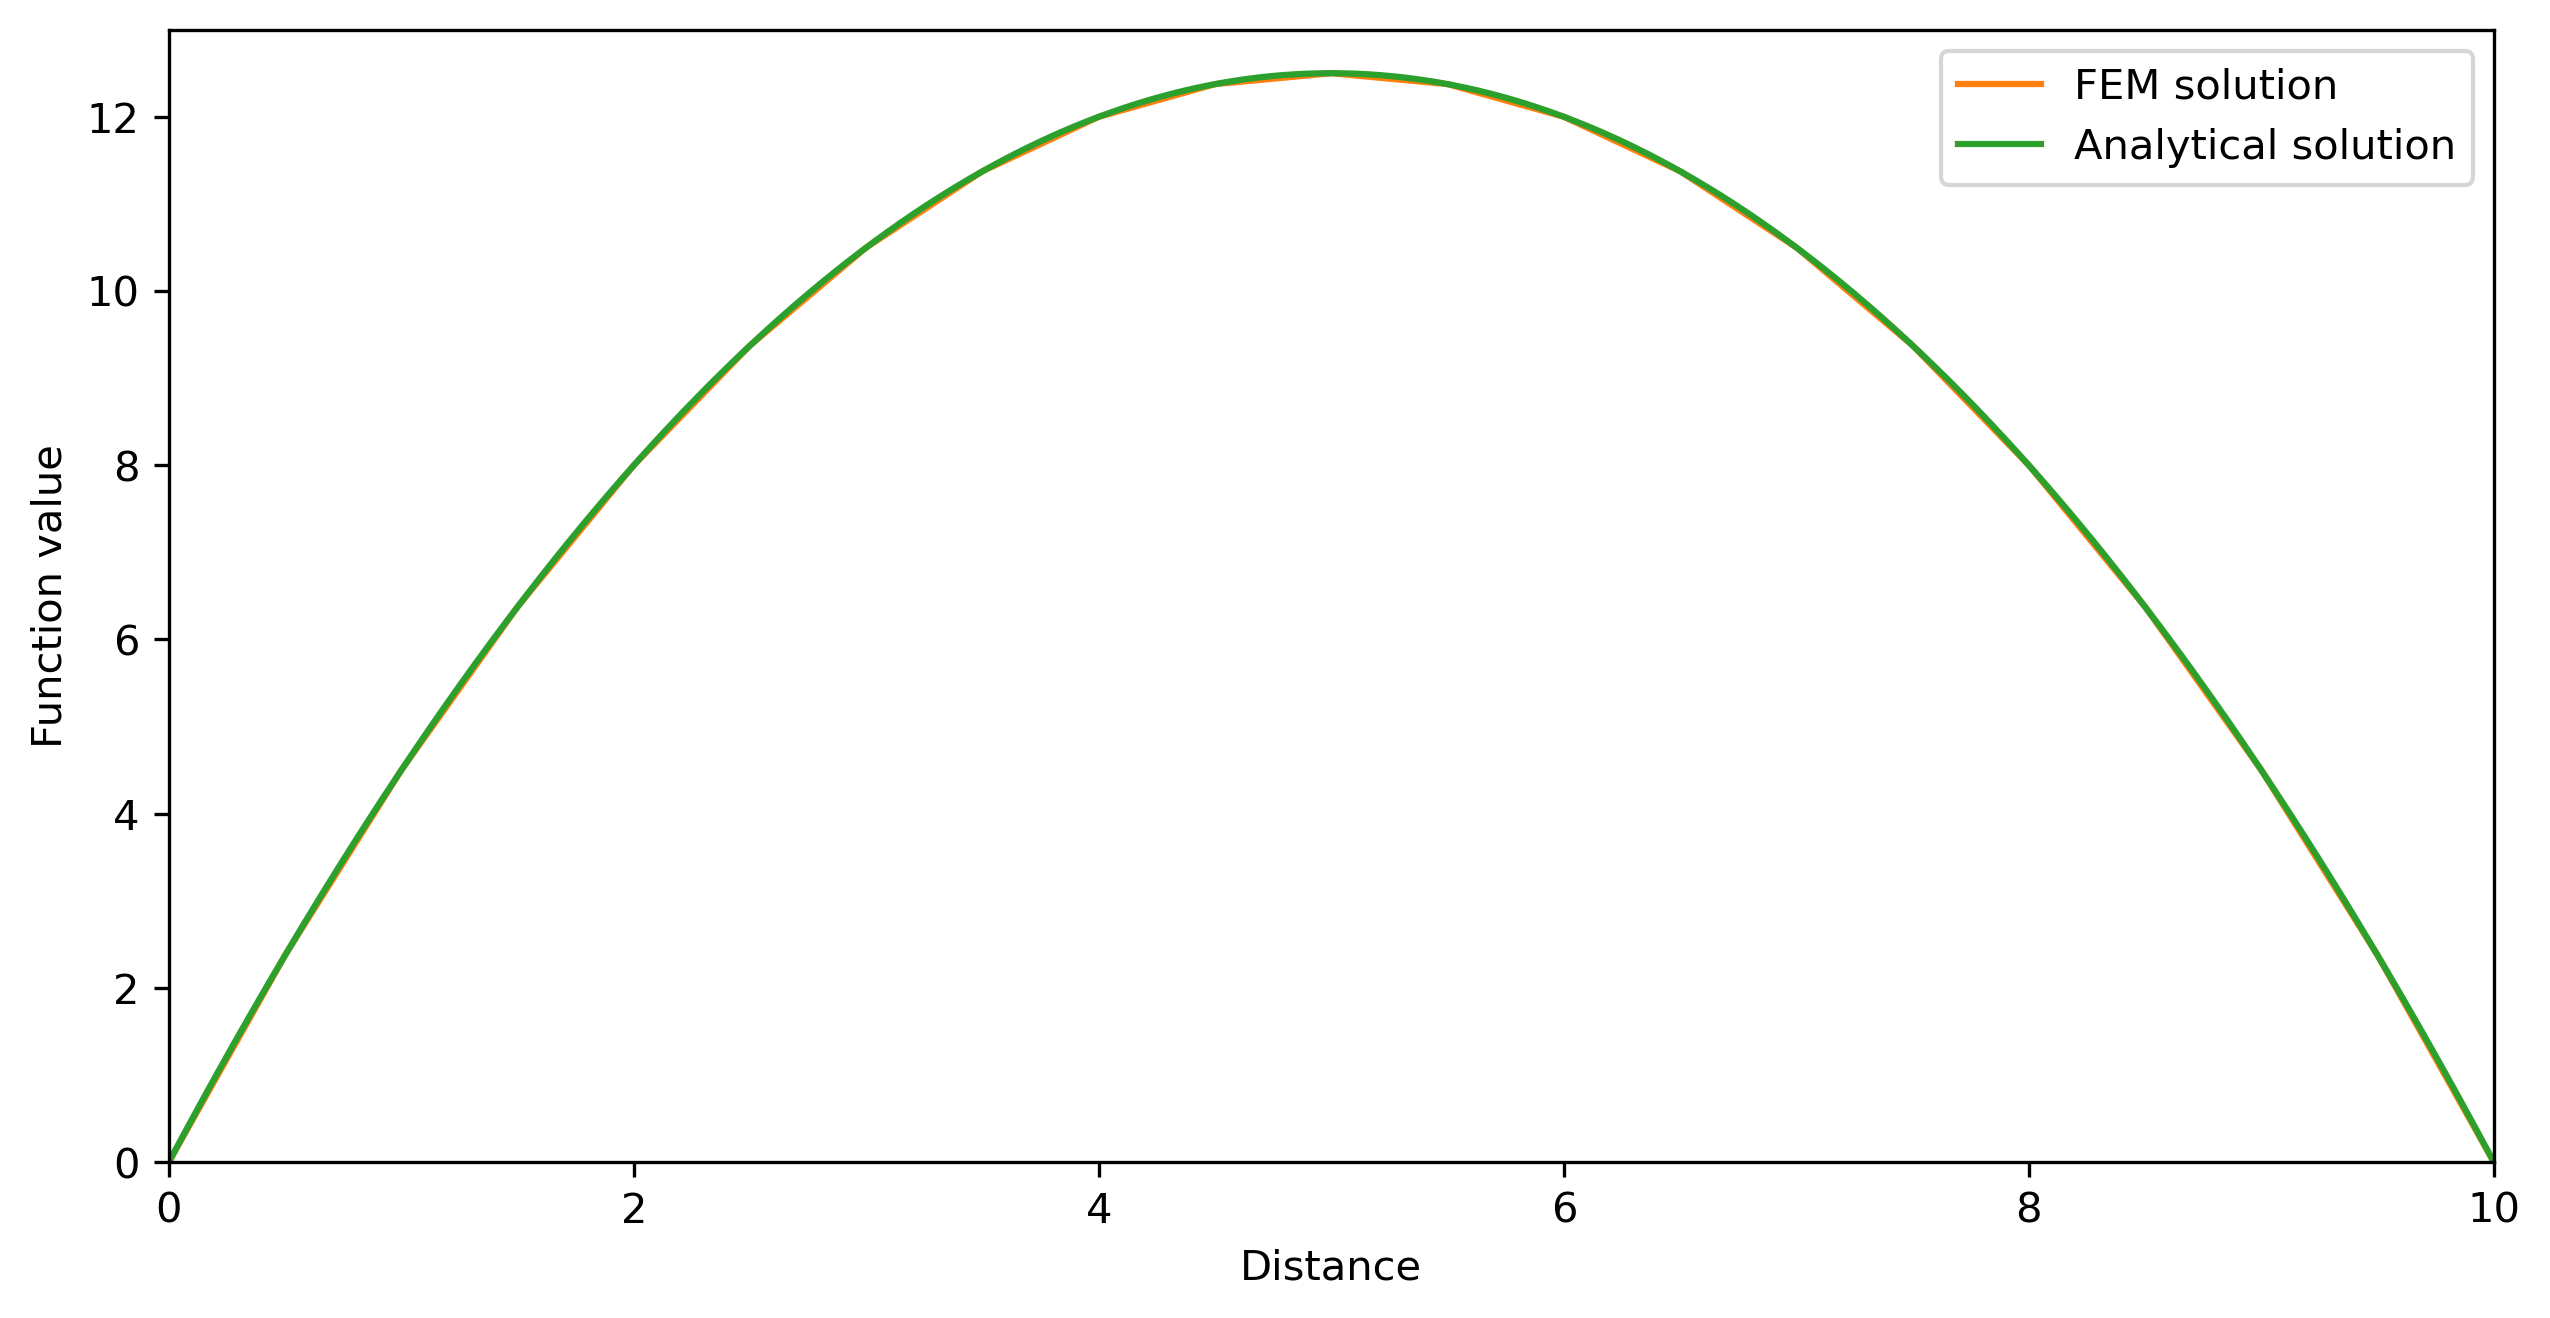

In [26]:
# and solve!

Tnew=spsolve(A_all,Rhs_all)

#Analytical solution
X     = np.linspace(0,lx, 100*nnod)
T_ana = -1/2*Q/k*np.square(X) + 1/2*Q/k*lx*X;

# Plotting
fig = plt.figure(figsize=(10,5))
fig.clf()
ax  = plt.axes(xlim=(0, lx), ylim=(0, 13))
line, = ax.plot([], [], lw=1)
ax.set_xlabel('Distance')
ax.set_ylabel('Function value')

plt.plot(Gcoord, Tnew, label='FEM solution')
plt.plot(X, T_ana, label='Analytical solution')
plt.legend()

